In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
%load_ext autoreload
%autoreload 2

import rbm_qst
import rbm_classic

import utils
import paper_functions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Research

## RBM QST

In [25]:
num_units = 3
num_samples = 2000

dataset = utils.dataset_w(num_units, num_samples, hist=False)
r_qst = rbm_qst.RBM_QST(num_units, 3)

# # Replace `r_qst.weights_lambda` with `r_cl.weights`.
# #
# r_cl = rbm_classic.RBM(num_units, 5)  # RBM from rbm_classic.py
# r_cl.train(dataset, max_epochs=150, learning_rate=0.5)
# r_qst.weights_lambda = r_cl.weights


In [26]:
r_qst.train(dataset, dataset, max_epochs=2000, learning_rate=0.9, debug=True, precise=True)

Epoch 0: objective is 2.0896294556
Epoch 100: objective is 1.78929654458
Epoch 200: objective is 1.52811460198
Epoch 300: objective is 1.27946929199
Epoch 400: objective is 1.18765561783
Epoch 500: objective is 1.15110971067
Epoch 600: objective is 1.13241294795
Epoch 700: objective is 1.12123593259
Epoch 800: objective is 1.1138527561
Epoch 900: objective is 1.10863004343
Epoch 1000: objective is 1.1047476417
Epoch 1100: objective is 1.10175117507
Epoch 1200: objective is 1.09936953497
Epoch 1300: objective is 1.09743133766
Epoch 1400: objective is 1.09582311454
Epoch 1500: objective is 1.0944668489
Epoch 1600: objective is 1.093307189
Epoch 1700: objective is 1.09230381166
Epoch 1800: objective is 1.09142667321
Epoch 1900: objective is 1.0906529521


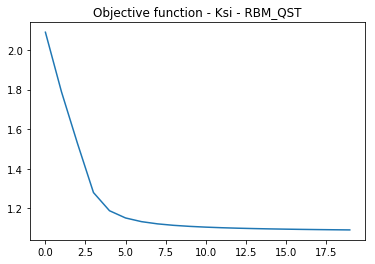

In [27]:
plt.plot(r_qst.objectives)
plt.title('Objective function - Ksi - RBM_QST')
plt.show()

In [28]:
# Fidelity.
fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(dataset))
fid

0.9386981534790596

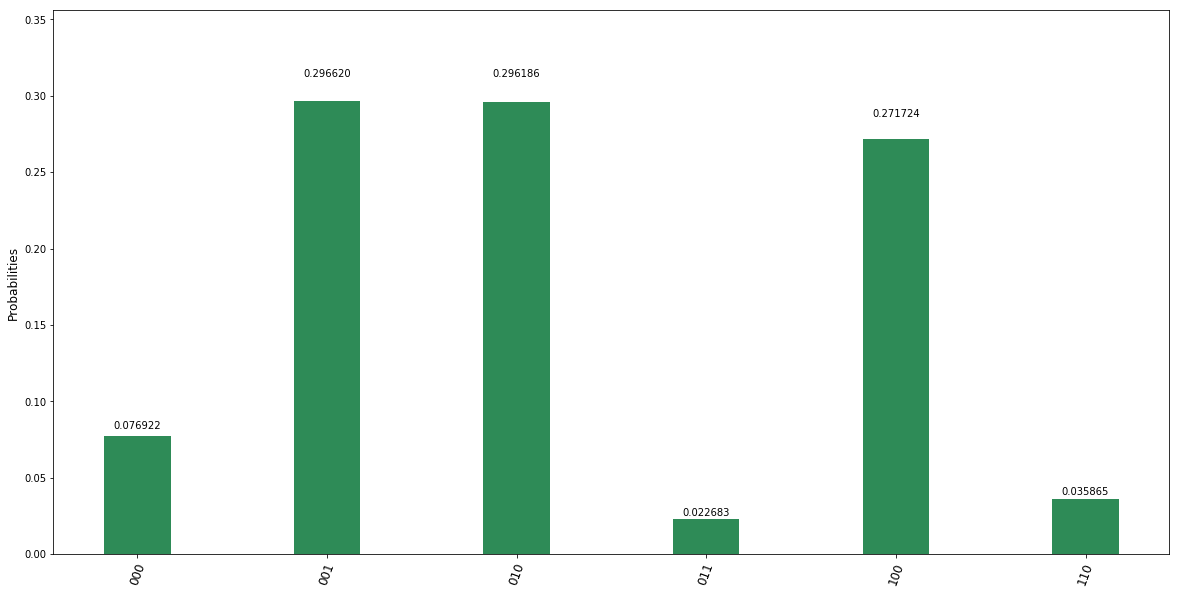

In [6]:
utils.plot_histogram(states)

## Classical RBM

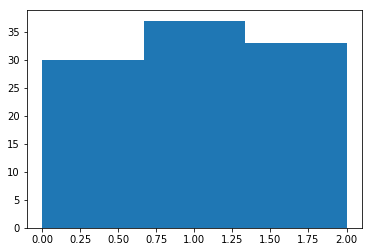

In [7]:
num_units = 3

r_cl = rbm_classic.RBM(num_units, 2)
dataset = utils.dataset_w(num_units, 100, hist=True)

In [8]:
r_cl.train(dataset, max_epochs=500, learning_rate=0.5)

Epoch 0: objective is 2.07874865371
Epoch 50: objective is 1.9378942441
Epoch 100: objective is 1.78736081265
Epoch 150: objective is 1.61995444424
Epoch 200: objective is 1.47809677013
Epoch 250: objective is 1.40397930104
Epoch 300: objective is 1.37119340117
Epoch 350: objective is 1.34428404783
Epoch 400: objective is 1.32610144543
Epoch 450: objective is 1.30742741974


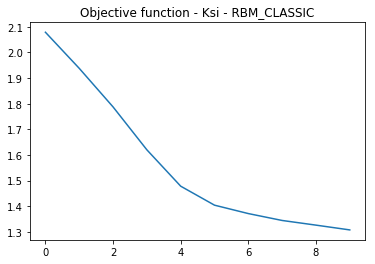

In [9]:
plt.plot(r_cl.objectives)
plt.title('Objective function - Ksi - RBM_CLASSIC')
plt.show()

In [10]:
# Fidelity.
fid, states = utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)))
fid

0.89902991649765218

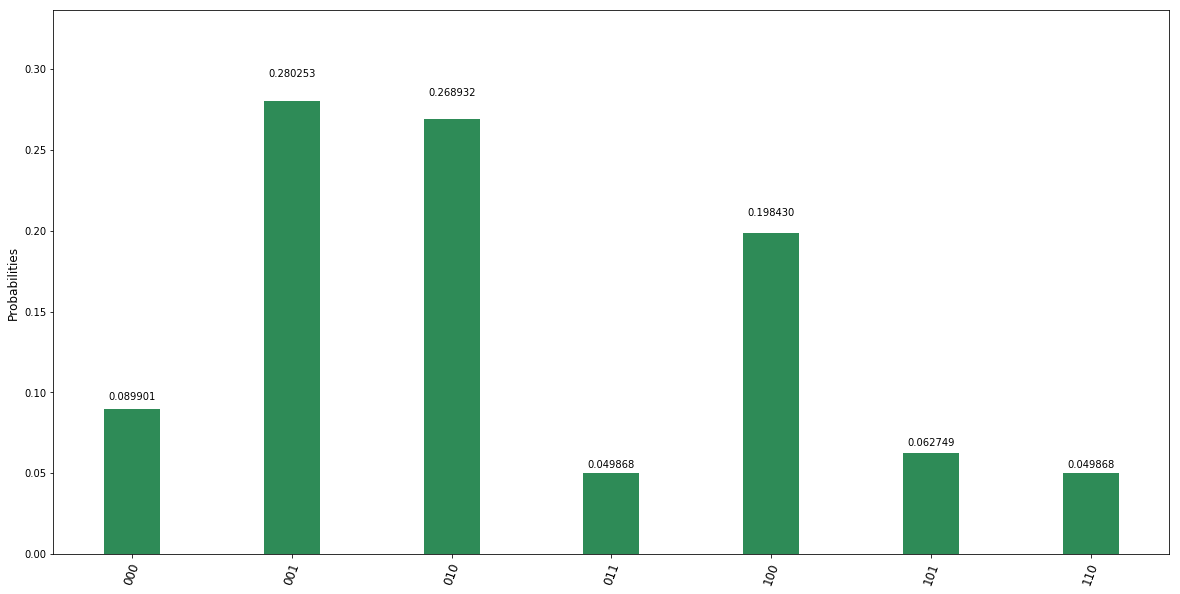

In [11]:
utils.plot_histogram(states)

# Plot Fig.1 b

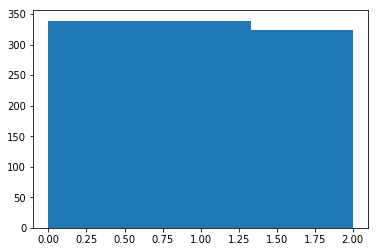

In [14]:
dataset = utils.dataset_w(num_units, 1000, hist=True)

In [19]:
import tqdm

num_units = 3
fidelities = []
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_cl = rbm_classic.RBM(num_units, num_units, debug_print=False)
    r_cl.train(dataset, max_epochs=10000, learning_rate=0.3)

    fidelities.append(utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)))[0])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))

100%|██████████| 4/4 [00:08<00:00,  2.27s/it]


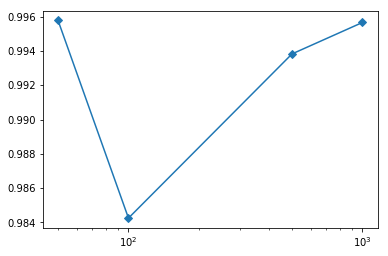

In [20]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.show()

In [257]:
import tqdm

num_units = 3
fidelities = []
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_qst = rbm_qst.RBM_QST(num_units, num_units)
    r_qst.train(dataset, dataset, max_epochs=500, learning_rate=0.9)

    fidelities.append(utils.fidelity_RBM(r_qst, utils.into_dict(utils.ideal_w(num_units)))[0])
    print(fidelities[-1])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))

 25%|██▌       | 1/4 [00:02<00:06,  2.13s/it]

0.900757985478


 50%|█████     | 2/4 [00:05<00:05,  2.51s/it]

0.899375844188


 75%|███████▌  | 3/4 [00:20<00:06,  6.17s/it]

0.813115629923


100%|██████████| 4/4 [00:48<00:00, 12.69s/it]

0.906301373461


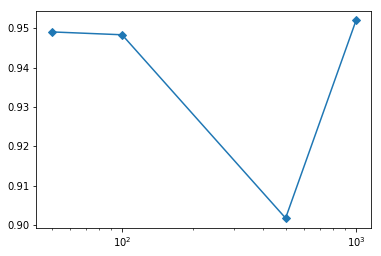

In [258]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.show()